## Introduction

**Objective:**

Retail businesses must strategically decide storage facility locations in order to create optimal supply chains.

With the [geographic boundary of Gujarat](https://commons.wikimedia.org/wiki/File:Gujarat_map_for_WLM-IN.svg) and district-wise [locations](https://commons.wikimedia.org/wiki/File:Administrative_map_of_Gujarat.png) and [population](https://censusindia.gov.in/nada/index.php/catalog/43357/download/47050/24%20A-2%20Gujrat.pdf) available via [Wikimedia Commons](https://commons.wikimedia.org/wiki/Commons:Welcome) (cross-checked with [map from Survey of India, Govt. of India](https://surveyofindia.gov.in/files/Gujarat%20Map.pdf)) and [2011 Census Tables, Govt of India](https://censusindia.gov.in/census.website/data/census-tables), our goal is to find optimal locations and inventory sizes of warehouses, assuming population reflects demand and inventory size reflects supply.

## Obtaining data

I obtained the map of gujarat with districts from Wikimedia Commons and placed it in `data/warehouses` folder. Let's load it up.

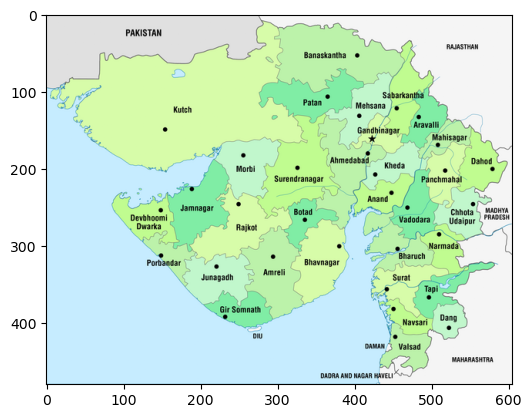

In [136]:
import matplotlib.pyplot as plt
img = plt.imread("data\warehouses\Administrative_map_of_Gujarat.png")
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

Now let's get the populations for all these districts. This we have to prepare manually since the data is in a PDF format.

In [137]:
districts = ['Kachchh', 'BanasKantha', 'Patan', 'Mahesana', 'SabarKantha',
             'Gandhinagar', 'Ahmadabad', 'Surendranagar', 'Rajkot', 'Jamnagar',
             'Porbandar', 'Junagadh', 'Amreli', 'Bhavnagar', 'Anand',
             'Kheda', 'PanchMahal', 'Dohad', 'Vadodara', 'Narmada',
             'Bharuch', 'Dang', 'Navsari', 'Valsad', 'Surat',
             'Tapi']

populations = [2092371, 3120506, 1343734, 2035064, 2428589,
               1391753, 7214225, 1756268, 3804558, 2160119,
                585449, 2743082, 1514190, 2880365, 2092745,
               2299885, 2390776, 2127086, 4165626,  590297,
               1551019,  228291, 1329672, 1705678, 6081322,
                807022]

import pandas as pd
df = pd.DataFrame({'District' : districts, 'Population' : populations})
   
print(df) 

         District  Population
0         Kachchh     2092371
1     BanasKantha     3120506
2           Patan     1343734
3        Mahesana     2035064
4     SabarKantha     2428589
5     Gandhinagar     1391753
6       Ahmadabad     7214225
7   Surendranagar     1756268
8          Rajkot     3804558
9        Jamnagar     2160119
10      Porbandar      585449
11       Junagadh     2743082
12         Amreli     1514190
13      Bhavnagar     2880365
14          Anand     2092745
15          Kheda     2299885
16     PanchMahal     2390776
17          Dohad     2127086
18       Vadodara     4165626
19        Narmada      590297
20        Bharuch     1551019
21           Dang      228291
22        Navsari     1329672
23         Valsad     1705678
24          Surat     6081322
25           Tapi      807022


## Data Preparation

**Task:**

We need to add approximate coordinates of the district centers from the map to the dataframe.

**Strategy:**

We will use `threshold` in OpenCV to filter the image to show only the markers and labels. And we will use its mouse handler functionality `setMouseCallback` to record coordinates upon mouse clicks.

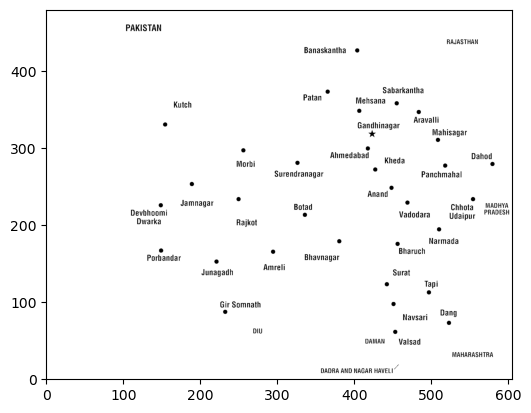

In [138]:
import cv2 as cv

img = cv.imread("data\warehouses\Administrative_map_of_Gujarat_High_Res.png", cv.IMREAD_GRAYSCALE)
_, img = cv.threshold(img, 25,255,cv.THRESH_BINARY)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

plt.imshow(cimg, extent=[0, 605, 0, 480])
plt.show()

By running the following Python code in an external file, I collected the approximate coordinates of the district centers:

```python
import cv2 as cv

img = cv.imread("data\warehouses\Administrative_map_of_Gujarat_High_Resolution.png", cv.IMREAD_GRAYSCALE)
_, img = cv.threshold(img, 25,255,cv.THRESH_BINARY)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

# function to display the coordinates of 
# of the points clicked on the image  
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks 
    if event == cv.EVENT_LBUTTONDOWN:
        # printing the coordinates
        print('[', x, ', ', y, ']')

# displaying the image
cv.imshow('image', cimg)
# setting mouse handler for image click events
cv.setMouseCallback('image', click_event)
# wait for a key to be pressed to exit 
cv.waitKey(0)
# close the window 
cv.destroyAllWindows()
```

Let us visualize these coordinates and add them to the dataframe:

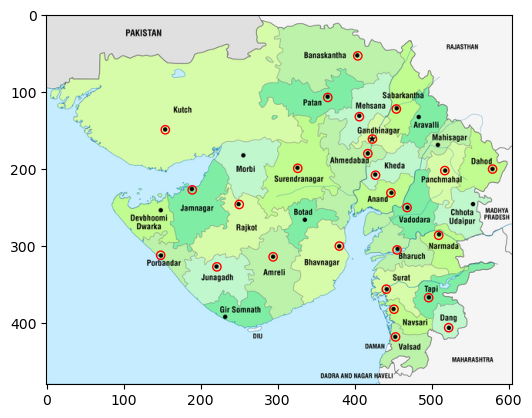

In [139]:
import numpy as np

coordinates = np.asarray([
    [154, 149], [404, 53], [365, 107], [406, 132], [454, 122],
    [423, 161], [417, 180], [326, 199], [250, 246], [189, 227],
    [148, 312], [221, 327], [294, 314], [380, 300], [447, 231],
    [427, 208], [517, 202], [579, 200], [468, 250], [509, 286],
    [455, 305], [522, 406], [451, 382], [453, 418], [441, 356],
    [496, 367]
])


img = plt.imread("data\warehouses\Administrative_map_of_Gujarat.png")
fig, ax = plt.subplots()
ax.imshow(img)
ax.scatter(coordinates[:,0], coordinates[:,1], facecolors='none', edgecolors='r')
plt.show()

In [140]:
df['x-coord'] = coordinates[:,0]
df['y-coord'] = coordinates[:,1]
print(df)

         District  Population  x-coord  y-coord
0         Kachchh     2092371      154      149
1     BanasKantha     3120506      404       53
2           Patan     1343734      365      107
3        Mahesana     2035064      406      132
4     SabarKantha     2428589      454      122
5     Gandhinagar     1391753      423      161
6       Ahmadabad     7214225      417      180
7   Surendranagar     1756268      326      199
8          Rajkot     3804558      250      246
9        Jamnagar     2160119      189      227
10      Porbandar      585449      148      312
11       Junagadh     2743082      221      327
12         Amreli     1514190      294      314
13      Bhavnagar     2880365      380      300
14          Anand     2092745      447      231
15          Kheda     2299885      427      208
16     PanchMahal     2390776      517      202
17          Dohad     2127086      579      200
18       Vadodara     4165626      468      250
19        Narmada      590297      509  

## Optimal locations

**Task:**

Given the coordinates and population of 26 districts in Gujarat, find optimal locations and inventory sizes of 6 to 10 warehouses, assuming population reflects demand and inventory size reflects supply.

**Strategy:**

Let's try ChatGPT for pair programming on this task. Being aware of prompt engineering concepts, I came up with the following prompt:

*AI Prompt:*
```
I am a Data Scientist.

Please suggest techniques that can be used to solve the optimization task in the problem statement below. There should be a Python library for the technique suggested. Don't suggest more than 4 techniques.

Problem Statement: Given the coordinates and population of districts in Gujarat, find optimal locations of warehouses, assuming population reflects demand.
```

Here are the 4 techniques suggested by ChatGPT:
- Linear Programming with PuLP
- Integer Programming with PuLP
- Genetic Algorithms with DEAP
- Particle Swarm Optimization with pyswarm

I searched for ways I could use PuLP library for this optimization task and found [this video on P-Median model](https://www.youtube.com/watch?v=ff7sCKhn1e0) relevant to the task at hand.

However, upon deeper understanding of P-Median model, I realized that it works when we already have warehouses locations and want to determine the allocation problem.

In our problem, unsupervised learning technique Clustering is suitable.

In [141]:
from sklearn.cluster import KMeans
knn = KMeans(n_clusters=12, n_init='auto', random_state=42)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
knn.fit(df[['x-coord','y-coord']])

KMeans(n_clusters=12, n_init='auto', random_state=42)

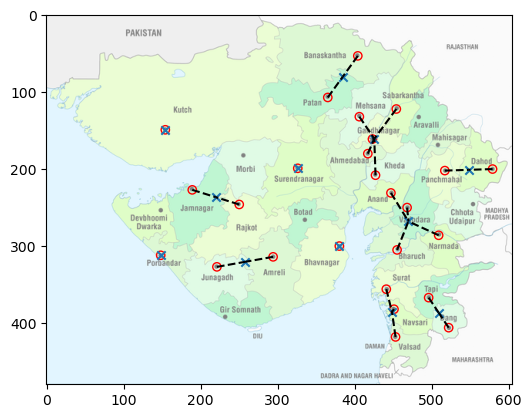

In [142]:
fig, ax = plt.subplots()
ax.imshow(img, alpha=0.5)
ax.scatter(coordinates[:,0], coordinates[:,1], facecolors='none', edgecolors='r')
ax.scatter(knn.cluster_centers_[:,0], knn.cluster_centers_[:,1], marker='x')
for i in range(26):
    line = np.asarray([coordinates[i],knn.cluster_centers_[knn.labels_[i]]])
    ax.plot(line[:,0],line[:,1], 'k--')

plt.show()

**Cost Optimization**

We will make a plot of 'number of optimally located warehouses' vs 'total cost'.

We assume transportation cost per distance as 0.05 and cost of facility opening as 5 per facility.

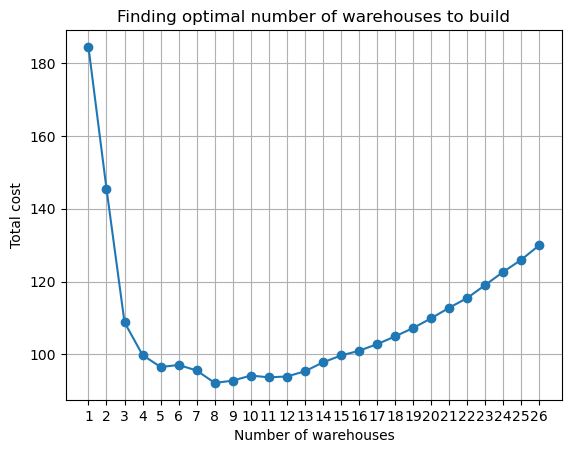

In [143]:
transport_cost_per_distance = 0.05
fixed_cost_per_warenouse = 5

def costing(n):
    knn = KMeans(n_clusters=n, n_init='auto', random_state=42)
    knn.fit(df[['x-coord','y-coord']])
    
    total_dist=0
    for i in range(len(df[['x-coord','y-coord']])):
        coord = df[['x-coord','y-coord']].iloc[i].to_numpy()
        line = np.asarray([coord,knn.cluster_centers_[knn.labels_[i]]])
        total_dist += np.linalg.norm(line[0]-line[1])

    transport_cost = total_dist * transport_cost_per_distance
    fixed_cost = knn.n_clusters * fixed_cost_per_warenouse
    total_cost = transport_cost + fixed_cost
    
    return total_cost

costs = [costing(i) for i in range(1,27)]

fig, ax = plt.subplots()
ax.plot(range(1,27), costs, 'o-')
ax.set(xlabel='Number of warehouses', ylabel='Total cost',
       title='Finding optimal number of warehouses to build')
ax.set_xticks(range(1,27))
ax.grid()
plt.show()

The most cost efficient case is 8 warehouses. Let's visualize this and second best case (9 warehouses): 

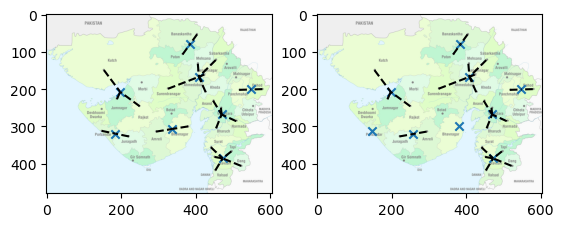

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img, alpha=0.5)
knn = KMeans(n_clusters=8, n_init='auto', random_state=42)
knn.fit(df[['x-coord','y-coord']])
ax1.scatter(knn.cluster_centers_[:,0], knn.cluster_centers_[:,1], marker='x')
for i in range(len(df[['x-coord','y-coord']])):
    coord = df[['x-coord','y-coord']].iloc[i].to_numpy()
    line = np.asarray([coord,knn.cluster_centers_[knn.labels_[i]]])
    ax1.plot(line[:,0],line[:,1], 'k--')

ax2.imshow(img, alpha=0.5)
knn = KMeans(n_clusters=9, n_init='auto', random_state=42)
knn.fit(df[['x-coord','y-coord']])
ax2.scatter(knn.cluster_centers_[:,0], knn.cluster_centers_[:,1], marker='x')
for i in range(len(df[['x-coord','y-coord']])):
    coord = df[['x-coord','y-coord']].iloc[i].to_numpy()
    line = np.asarray([coord,knn.cluster_centers_[knn.labels_[i]]])
    ax2.plot(line[:,0],line[:,1], 'k--')

plt.show()

While the cost of both the setup is same, the one on left is preferable since there is better divide and conquer. In fact, when we look at the 3rd and 4th 'optimal' solutions and so on, we see a pattern: as we increase number of warehouses, the model starts overfitting the dataset. That is, we loose the benefit of servicing multiple locations with a warehouse.

So, the best choice is the optimal solution itself with 8 warehouses:

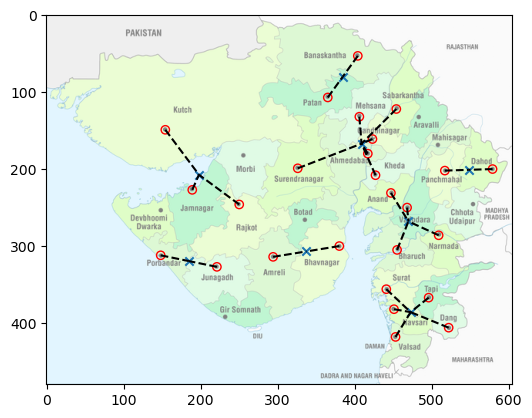

In [145]:
fig, ax = plt.subplots()
ax.imshow(img, alpha=0.5)
knn = KMeans(n_clusters=8, n_init='auto', random_state=42)
knn.fit(df[['x-coord','y-coord']])
ax.scatter(coordinates[:,0], coordinates[:,1], facecolors='none', edgecolors='r')
warehouse_coords = knn.cluster_centers_
ax.scatter(warehouse_coords[:,0], warehouse_coords[:,1], marker='x', edgecolors='b')
for i in range(26):
    line = np.asarray([coordinates[i],warehouse_coords[knn.labels_[i]]])
    ax.plot(line[:,0],line[:,1], 'k--')

plt.show()

But we're not done yet. Note that the warehouse serving Kachch serves it over a big stretch of water. This happened because the algorithm has no knowledge of the terrain. So, we need to manually move this warehouse.

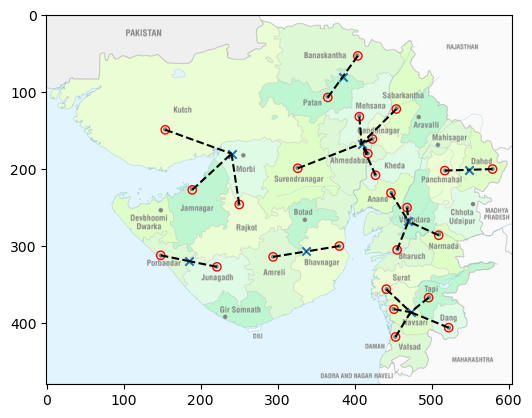

In [146]:
fig, ax = plt.subplots()
ax.imshow(img, alpha=0.5)
knn = KMeans(n_clusters=8, n_init='auto', random_state=42)
knn.fit(df[['x-coord','y-coord']])
ax.scatter(coordinates[:,0], coordinates[:,1], facecolors='none', edgecolors='r')
warehouse_coords = knn.cluster_centers_
warehouse_coords[0] = [240, 180]
ax.scatter(warehouse_coords[:,0], warehouse_coords[:,1], marker='x', edgecolors='b')
for i in range(26):
    line = np.asarray([coordinates[i],warehouse_coords[knn.labels_[i]]])
    ax.plot(line[:,0],line[:,1], 'k--')

plt.show()

Hence, we have 8 optimally located warehouses with their coordinates:

In [147]:
warehouses = ['W1', 'W2', 'W3', 'W4',
              'W5', 'W6', 'W7', 'W8']

df2 = pd.DataFrame({'Warehouse' : warehouses})
df2['x-coord'] = np.round(warehouse_coords[:,0], 2)
df2['y-coord'] = np.round(warehouse_coords[:,1], 2)
print(df2)

  Warehouse  x-coord  y-coord
0        W1   240.00    180.0
1        W2   469.75    268.0
2        W3   384.50     80.0
3        W4   472.60    385.8
4        W5   408.83    167.0
5        W6   337.00    307.0
6        W7   184.50    319.5
7        W8   548.00    201.0


## Allocating Inventory

**Idea:**

For the initial inventory size i.e. supply, we can use the total population served as an indicator of demand.

**Strategy:**

We will sum the population served by each warehouse and divide it by 1000 to determine the initial inventory size. (Afterwards, as orders come in, required inventory could be maintained by demand forcasting.)

In [148]:
inv_sizes = []
for i in range(8):
    inv_size = 0
    for j in range(26):
        if knn.labels_[j]==i:
            inv_size += round(populations[j]/1000)
    inv_sizes.append(inv_size)

df2['Inventory'] = inv_sizes

**Conclusion:**

Finally, we have the locations and inventory sizes of 8 warehouses across the Gujarat map*:

*Note: I could convert the coordinates from the local map space to actual longitude and latitude, but I'm concluding the project here.

In [149]:
df2

,Warehouse,x-coord,y-coord,Inventory
0,W1,240.00,180.0,8057
1,W2,469.75,268.0,8400
2,W3,384.50,80.0,4465
3,W4,472.60,385.8,10152
4,W5,408.83,167.0,17126
5,W6,337.00,307.0,4394
6,W7,184.50,319.5,3328
7,W8,548.00,201.0,4518
